<a href="https://colab.research.google.com/github/Nisha40108/ADVANCED-MACHINE-LEARNING-64061-/blob/main/AML%20Assignment%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 1 - Neural Network - IMDB data set**
#**Name: Nisha Chaurasia**
#**Date: 09-21-2023**

######Using the IMDB data set from the library tensorflow.keras.dataset

In [65]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [66]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

######Decoding Reviews back to text

In [67]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

######The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension)

In [68]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

######Vectorised Train & Test data

In [69]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

######Building Model using Relu function

In [70]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

######Compiling the model

In [71]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

######Validating your approach : Setting aside a validation set

In [72]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

######Training the model with batch size 512 and 20 epochs

In [73]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5451 - accuracy: 0.7546 - val_loss: 0.4188 - val_accuracy: 0.8562
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3377 - accuracy: 0.8905 - val_loss: 0.3189 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2515 - accuracy: 0.9155 - val_loss: 0.2979 - val_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2027 - accuracy: 0.9327 - val_loss: 0.2758 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1720 - accuracy: 0.9431 - val_loss: 0.2764 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1459 - accuracy: 0.9536 - val_loss: 0.2851 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1231 - accuracy: 0.9634 - val_loss: 0.3018 - val_accuracy: 0.8809
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

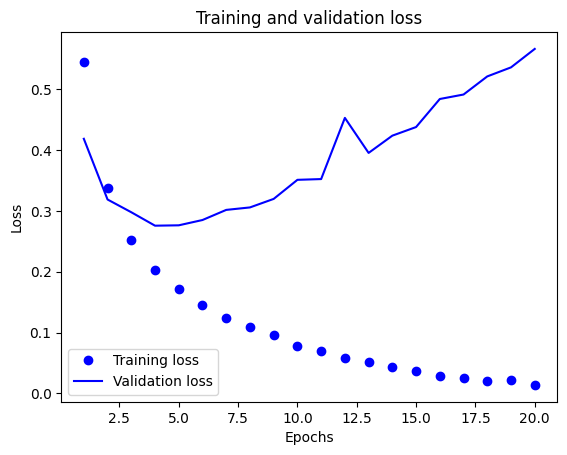

In [74]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation Accuracy

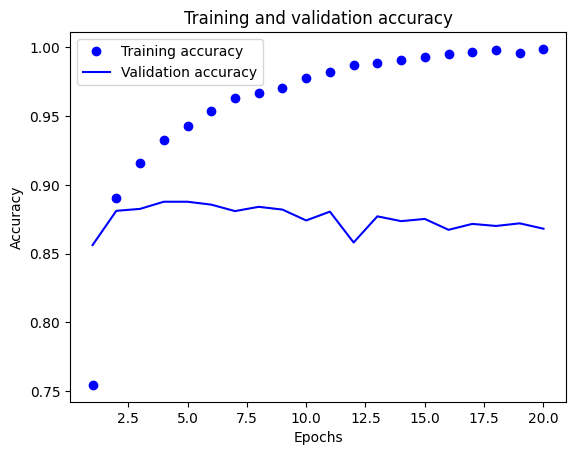

In [75]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

######Training the model from scratch - Model 1 Using epoches 4

In [76]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4665 - accuracy: 0.8149
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2750 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2169 - accuracy: 0.9210
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2895 - accuracy: 0.8847


In [77]:
results

[0.2894919812679291, 0.8847200274467468]

######Using a train model to genereate prediction on new data

In [78]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.21907026],
       [0.99924916],
       [0.92140067],
       ...,
       [0.10084969],
       [0.07862694],
       [0.65771914]], dtype=float32)

######Training the model 2 using epoches 5

In [79]:
# Install Keras
!pip install keras

# Import Keras
import keras
from keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 13ms/step - loss: 0.4597 - accuracy: 0.8153
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2703 - accuracy: 0.9050
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2104 - accuracy: 0.9235
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 0.1818 - accuracy: 0.9347
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3161 - accuracy: 0.8774


In [80]:
results

[0.3160618245601654, 0.8773999810218811]

###**1:Above used two hidden layers. Now using three hidden layers to see how doing so affects validation and test accuracy**

######Model 1.1 Trained with 3 layers

In [81]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5638 - accuracy: 0.7616 - val_loss: 0.4446 - val_accuracy: 0.8520
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3520 - accuracy: 0.8867 - val_loss: 0.3408 - val_accuracy: 0.8684
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2549 - accuracy: 0.9155 - val_loss: 0.2898 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2014 - accuracy: 0.9343 - val_loss: 0.2911 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1678 - accuracy: 0.9445 - val_loss: 0.2841 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1410 - accuracy: 0.9545 - val_loss: 0.2922 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1168 - accuracy: 0.9630 - val_loss: 0.3144 - val_accuracy: 0.8801
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

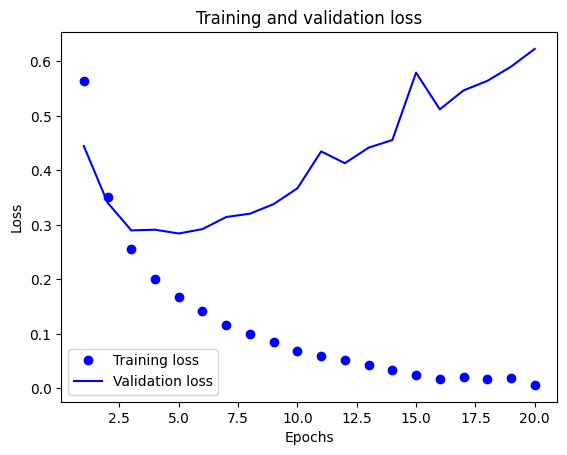

In [82]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracyplt.clf()

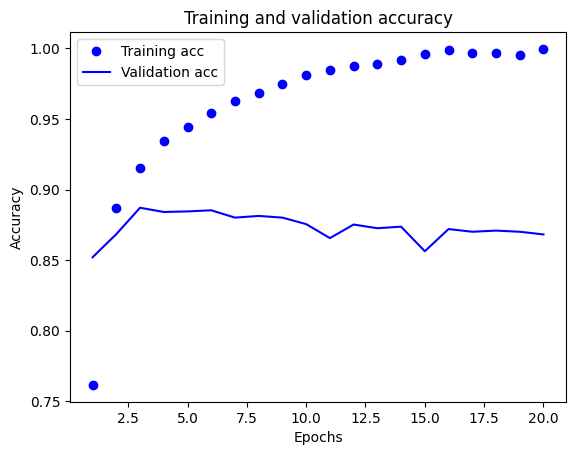

In [83]:
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/12
49/49 [==============================] - 1s 12ms/step - loss: 0.2291 - accuracy: 0.9461
Epoch 2/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1341 - accuracy: 0.9611
Epoch 3/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1047 - accuracy: 0.9685
Epoch 4/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0817 - accuracy: 0.9749
Epoch 5/12
49/49 [==============================] - 1s 12ms/step - loss: 0.0688 - accuracy: 0.9791
Epoch 6/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0501 - accuracy: 0.9869
Epoch 7/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0455 - accuracy: 0.9868
Epoch 8/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0347 - accuracy: 0.9914
Epoch 9/12
49/49 [==============================] - 1s 12ms/step - loss: 0.0266 - accuracy: 0.9937
Epoch 10/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0252 - accuracy: 0.9940
Epoch 11/

[0.2894919812679291, 0.8847200274467468]

######Model 1.2 Trained with 1 layers

In [85]:
model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5135 - accuracy: 0.7933 - val_loss: 0.4028 - val_accuracy: 0.8633
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3365 - accuracy: 0.8933 - val_loss: 0.3391 - val_accuracy: 0.8714
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2672 - accuracy: 0.9129 - val_loss: 0.3012 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2251 - accuracy: 0.9279 - val_loss: 0.2862 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1959 - accuracy: 0.9404 - val_loss: 0.2787 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1746 - accuracy: 0.9455 - val_loss: 0.2754 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1577 - accuracy: 0.9517 - val_loss: 0.2832 - val_accuracy: 0.8870
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

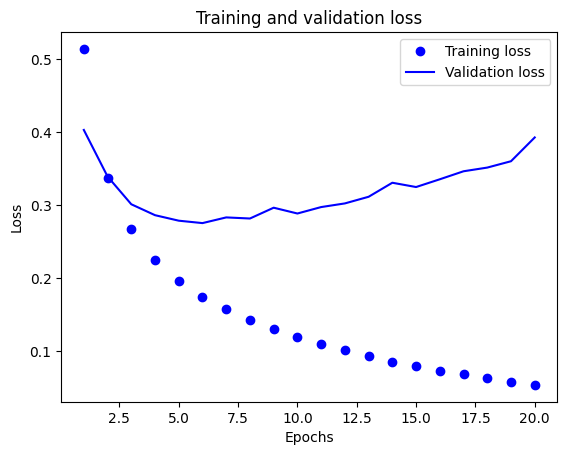

In [86]:
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracyplt.clf()

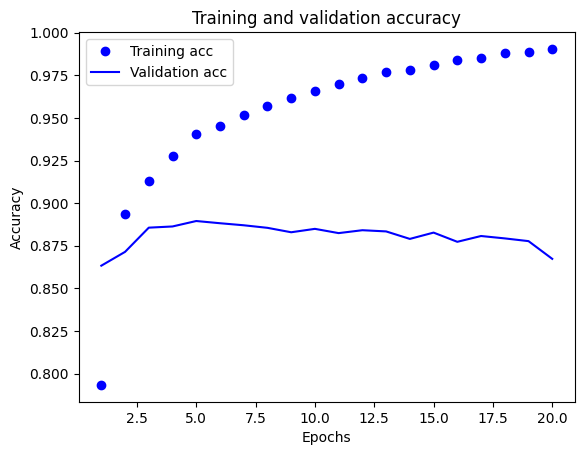

In [87]:
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [88]:
model_12.fit(x_train, y_train, epochs=12, batch_size=512)
results_M12 = model.evaluate(x_test, y_test)
results_M12

Epoch 1/12
49/49 [==============================] - 1s 12ms/step - loss: 0.1781 - accuracy: 0.9460
Epoch 2/12
49/49 [==============================] - 1s 12ms/step - loss: 0.1445 - accuracy: 0.9543
Epoch 3/12
49/49 [==============================] - 1s 12ms/step - loss: 0.1265 - accuracy: 0.9596
Epoch 4/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1138 - accuracy: 0.9643
Epoch 5/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1045 - accuracy: 0.9680
Epoch 6/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0948 - accuracy: 0.9717
Epoch 7/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0886 - accuracy: 0.9743
Epoch 8/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0820 - accuracy: 0.9762
Epoch 9/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0761 - accuracy: 0.9784
Epoch 10/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0712 - accuracy: 0.9809
Epoch 11/

[0.2894919812679291, 0.8847200274467468]

###**2: Using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.**

######Training the model with 32-Units

In [89]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5242 - accuracy: 0.7651 - val_loss: 0.3841 - val_accuracy: 0.8630
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3149 - accuracy: 0.8895 - val_loss: 0.3019 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2320 - accuracy: 0.9201 - val_loss: 0.3708 - val_accuracy: 0.8436
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1917 - accuracy: 0.9320 - val_loss: 0.2974 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1559 - accuracy: 0.9463 - val_loss: 0.2963 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1343 - accuracy: 0.9540 - val_loss: 0.3102 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1145 - accuracy: 0.9623 - val_loss: 0.3299 - val_accuracy: 0.8798
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

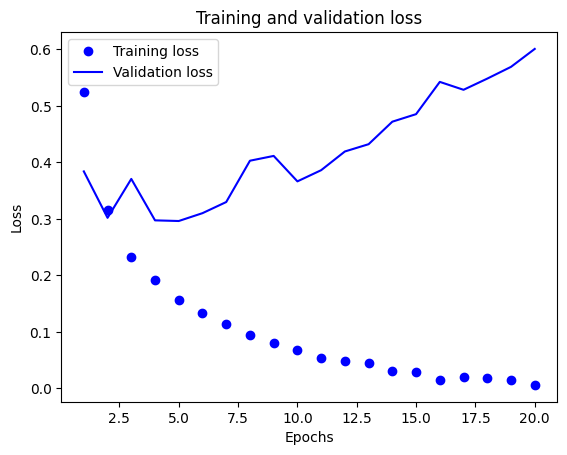

In [90]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

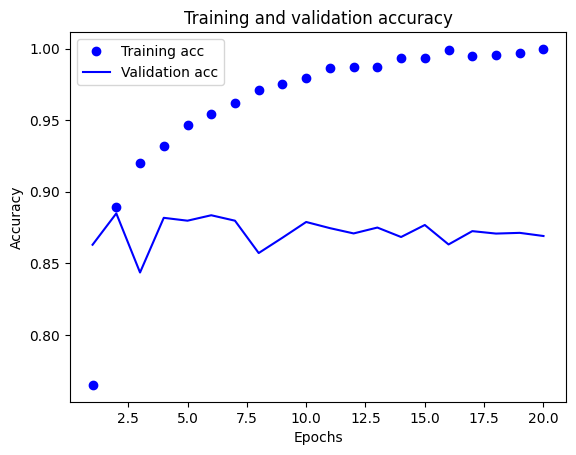

In [91]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [92]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 1s 14ms/step - loss: 0.2070 - accuracy: 0.9459
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1201 - accuracy: 0.9628
Epoch 3/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0898 - accuracy: 0.9730
Epoch 4/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0658 - accuracy: 0.9810
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0479 - accuracy: 0.9875
Epoch 6/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0341 - accuracy: 0.9913
Epoch 7/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0255 - accuracy: 0.9936
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5771 - accuracy: 0.8643


[0.5771164298057556, 0.8642799854278564]

######Training the model with 64-Units

In [93]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5147 - accuracy: 0.7419 - val_loss: 0.3478 - val_accuracy: 0.8685
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3010 - accuracy: 0.8815 - val_loss: 0.2954 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2183 - accuracy: 0.9197 - val_loss: 0.2806 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1871 - accuracy: 0.9295 - val_loss: 0.2820 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1460 - accuracy: 0.9485 - val_loss: 0.2894 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1204 - accuracy: 0.9569 - val_loss: 0.3038 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0971 - accuracy: 0.9684 - val_loss: 0.3234 - val_accuracy: 0.8847
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

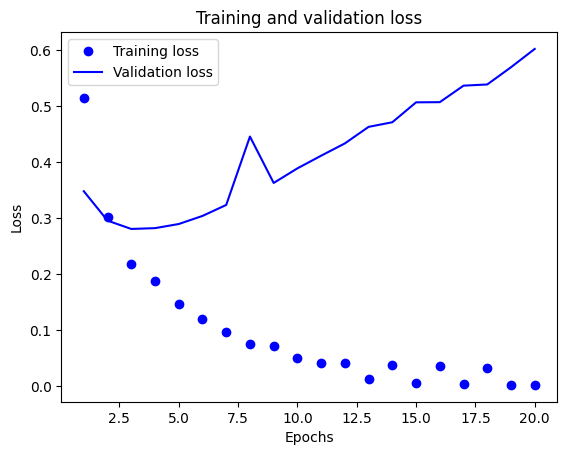

In [94]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

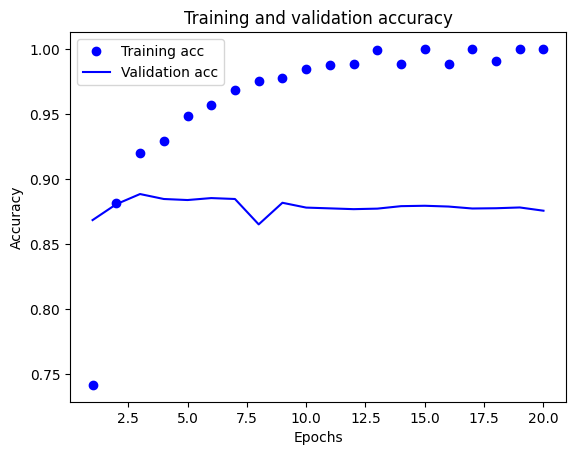

In [95]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [96]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 1s 22ms/step - loss: 0.1874 - accuracy: 0.9473
Epoch 2/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0992 - accuracy: 0.9682
Epoch 3/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0634 - accuracy: 0.9808
Epoch 4/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0395 - accuracy: 0.9894
Epoch 5/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0240 - accuracy: 0.9940
Epoch 6/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0182 - accuracy: 0.9946
Epoch 7/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.6265 - accuracy: 0.8673


[0.6264625191688538, 0.8673200011253357]

######Training the model with 128-Units

In [97]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5199 - accuracy: 0.7639 - val_loss: 0.3938 - val_accuracy: 0.8328
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2985 - accuracy: 0.8834 - val_loss: 0.2838 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2204 - accuracy: 0.9127 - val_loss: 0.3377 - val_accuracy: 0.8623
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1777 - accuracy: 0.9326 - val_loss: 0.2778 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1493 - accuracy: 0.9435 - val_loss: 0.2854 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1041 - accuracy: 0.9639 - val_loss: 0.4805 - val_accuracy: 0.8395
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0818 - accuracy: 0.9723 - val_loss: 0.6001 - val_accuracy: 0.8250
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

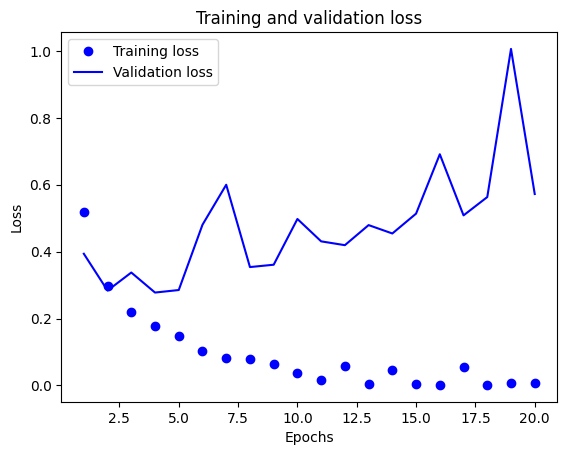

In [98]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

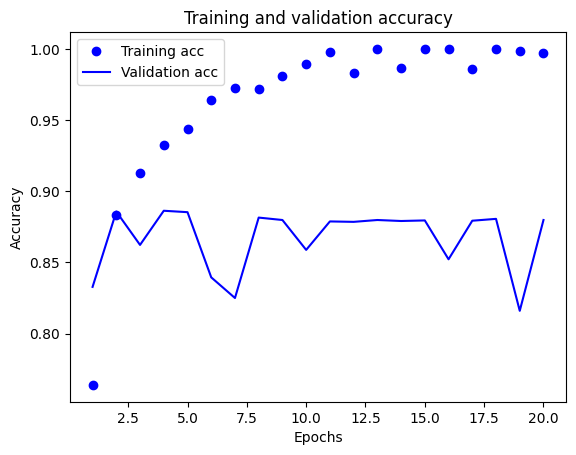

In [99]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 1s 28ms/step - loss: 0.1655 - accuracy: 0.9471
Epoch 2/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0817 - accuracy: 0.9746
Epoch 3/8
49/49 [==============================] - 1s 27ms/step - loss: 0.0453 - accuracy: 0.9867
Epoch 4/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0247 - accuracy: 0.9929
Epoch 5/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0174 - accuracy: 0.9947
Epoch 6/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 7/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0128 - accuracy: 0.9953
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.5433 - accuracy: 0.8634


[0.5433495044708252, 0.8633999824523926]

###**3: Using the mse loss function instead of binary_crossentropy**

In [101]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1852 - accuracy: 0.7618 - val_loss: 0.1361 - val_accuracy: 0.8512
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1099 - accuracy: 0.8831 - val_loss: 0.1077 - val_accuracy: 0.8662
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0812 - accuracy: 0.9083 - val_loss: 0.0904 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0666 - accuracy: 0.9248 - val_loss: 0.0857 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0572 - accuracy: 0.9353 - val_loss: 0.0858 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0486 - accuracy: 0.9463 - val_loss: 0.0902 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0437 - accuracy: 0.9527 - val_loss: 0.0832 - val_accuracy: 0.8869
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

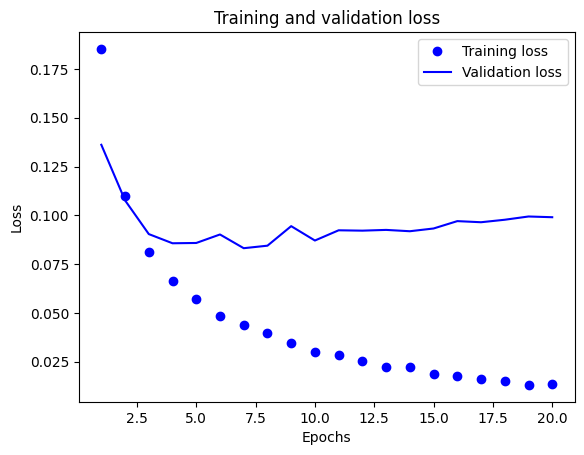

In [102]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

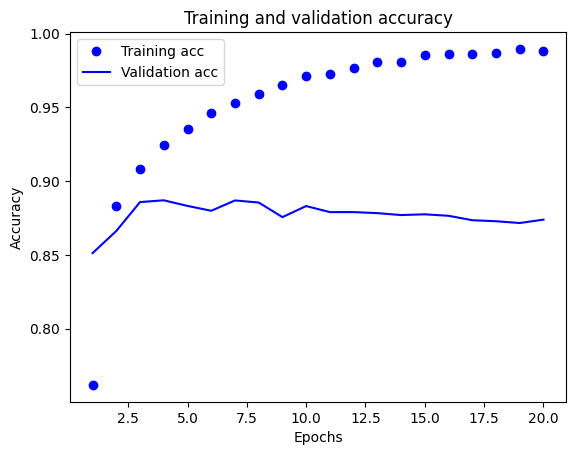

In [103]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [104]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0476 - accuracy: 0.9435
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0393 - accuracy: 0.9543
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0343 - accuracy: 0.9614
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0308 - accuracy: 0.9666
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0290 - accuracy: 0.9695
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0258 - accuracy: 0.9735
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0253 - accuracy: 0.9740
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1101 - accuracy: 0.8658


[0.11009581387042999, 0.8657600283622742]

###**4:Using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu**

######Training the model using Tanh Activation Function

In [105]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5003 - accuracy: 0.7951 - val_loss: 0.3769 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3056 - accuracy: 0.8972 - val_loss: 0.3465 - val_accuracy: 0.8517
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2217 - accuracy: 0.9257 - val_loss: 0.3001 - val_accuracy: 0.8738
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1772 - accuracy: 0.9380 - val_loss: 0.2738 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1393 - accuracy: 0.9517 - val_loss: 0.2984 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1137 - accuracy: 0.9643 - val_loss: 0.3520 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0955 - accuracy: 0.9703 - val_loss: 0.4349 - val_accuracy: 0.8574
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

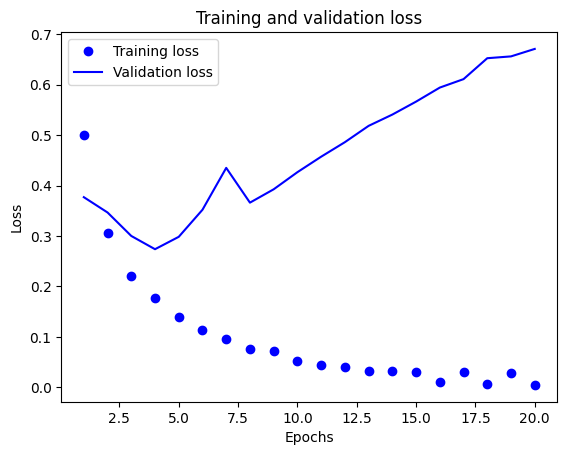

In [106]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

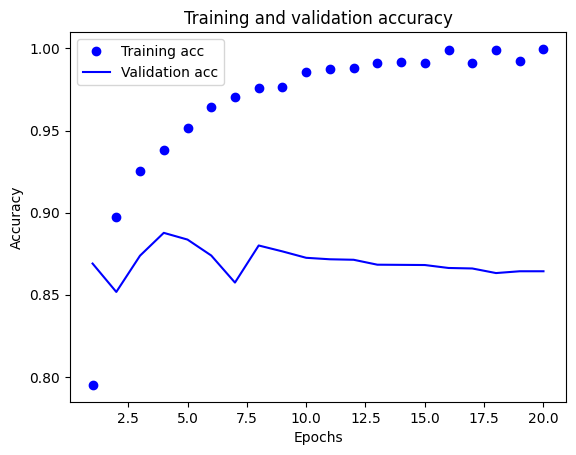

In [107]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2593 - accuracy: 0.9422
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1462 - accuracy: 0.9585
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1164 - accuracy: 0.9647
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1023 - accuracy: 0.9677
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0884 - accuracy: 0.9730
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0752 - accuracy: 0.9785
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0707 - accuracy: 0.9773
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.8540


[0.5561920404434204, 0.8540400266647339]

###**5:Using regularization, dropout,etc technique we studied in class to get the model perform better on validation**

######5.1:Regularization : Using L2 regularization (also known as weight decay)

In [109]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5879 - accuracy: 0.7705 - val_loss: 0.4482 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3805 - accuracy: 0.8910 - val_loss: 0.3663 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3012 - accuracy: 0.9140 - val_loss: 0.3568 - val_accuracy: 0.8755
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2590 - accuracy: 0.9311 - val_loss: 0.3300 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2316 - accuracy: 0.9409 - val_loss: 0.3442 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2173 - accuracy: 0.9453 - val_loss: 0.3439 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1990 - accuracy: 0.9564 - val_loss: 0.3508 - val_accuracy: 0.8815
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

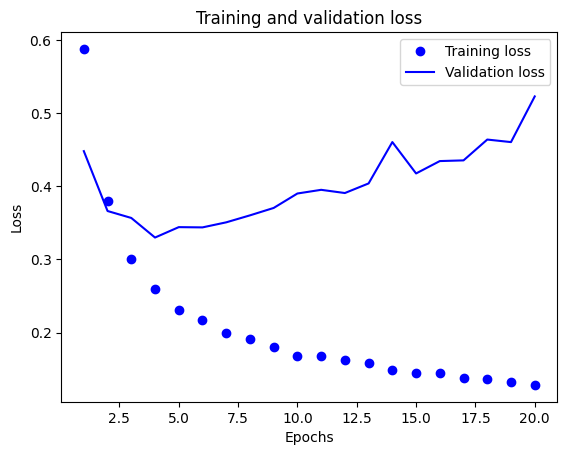

In [110]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

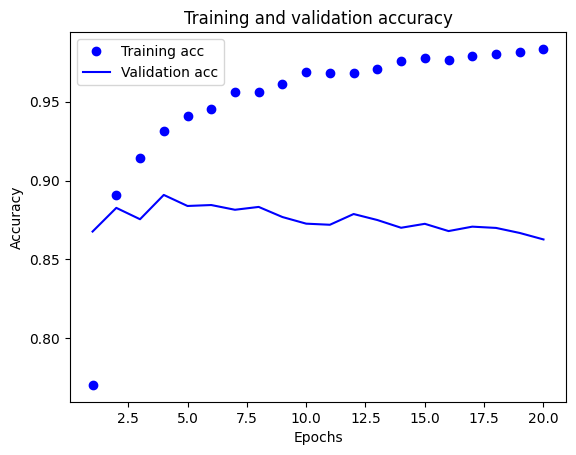

In [111]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [112]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2515 - accuracy: 0.9388
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2096 - accuracy: 0.9484
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1957 - accuracy: 0.9522
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1856 - accuracy: 0.9550
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1816 - accuracy: 0.9564
Epoch 6/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1722 - accuracy: 0.9615
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1684 - accuracy: 0.9625
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4398 - accuracy: 0.8682


[0.4398048520088196, 0.8682399988174438]

###### 5.2: dropout-layers.Dropout(0.5)

In [113]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6243 - accuracy: 0.6449 - val_loss: 0.5113 - val_accuracy: 0.8310
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4948 - accuracy: 0.7771 - val_loss: 0.3976 - val_accuracy: 0.8669
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.4119 - accuracy: 0.8368 - val_loss: 0.3420 - val_accuracy: 0.8819
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3548 - accuracy: 0.8653 - val_loss: 0.3057 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3091 - accuracy: 0.8887 - val_loss: 0.3091 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2722 - accuracy: 0.9063 - val_loss: 0.2911 - val_accuracy: 0.8763
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2506 - accuracy: 0.9183 - val_loss: 0.2744 - val_accuracy: 0.8898
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

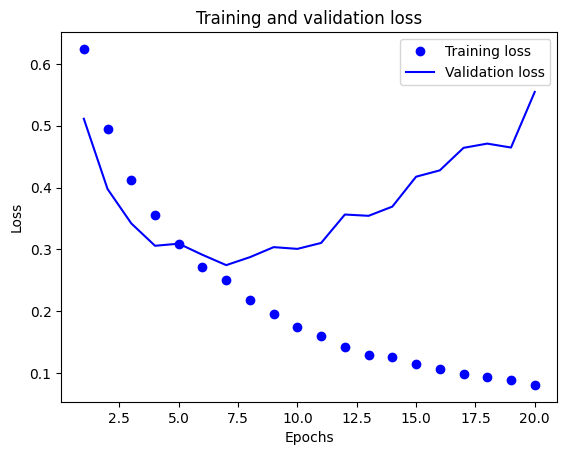

In [114]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

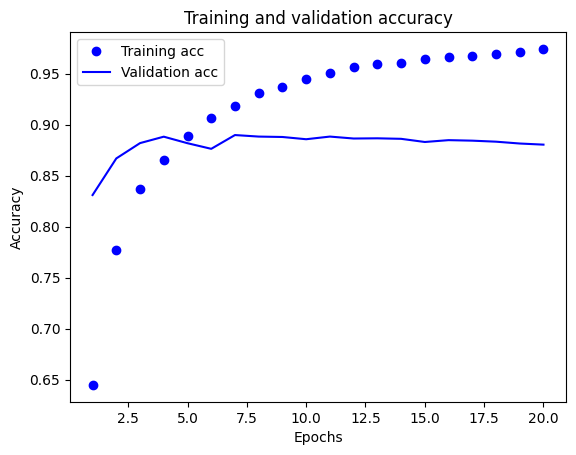

In [115]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [116]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2563 - accuracy: 0.9215
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2134 - accuracy: 0.9311
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1839 - accuracy: 0.9392
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1676 - accuracy: 0.9424
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1579 - accuracy: 0.9463
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1477 - accuracy: 0.9492
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1409 - accuracy: 0.9489
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4760 - accuracy: 0.8725


[0.47604313492774963, 0.8724799752235413]

######Training the model with Hypertunned Parameters mentioned above

In [117]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.2505 - accuracy: 0.5727 - val_loss: 0.2089 - val_accuracy: 0.8139
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2023 - accuracy: 0.7284 - val_loss: 0.1535 - val_accuracy: 0.8356
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1613 - accuracy: 0.8145 - val_loss: 0.1291 - val_accuracy: 0.8477
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1322 - accuracy: 0.8573 - val_loss: 0.1081 - val_accuracy: 0.8743
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1127 - accuracy: 0.8837 - val_loss: 0.0998 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0976 - accuracy: 0.9021 - val_loss: 0.0985 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0846 - accuracy: 0.9179 - val_loss: 0.1005 - val_accuracy: 0.8833
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

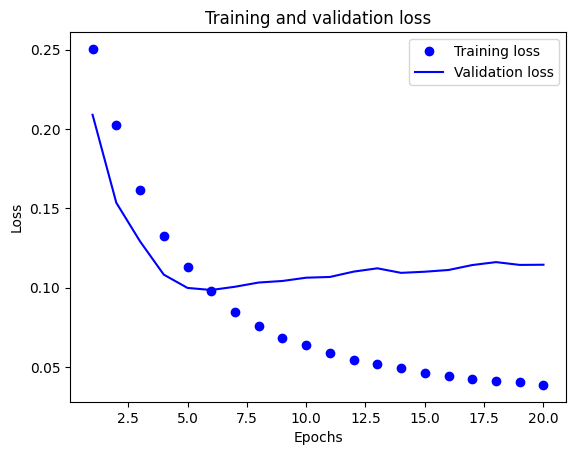

In [118]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

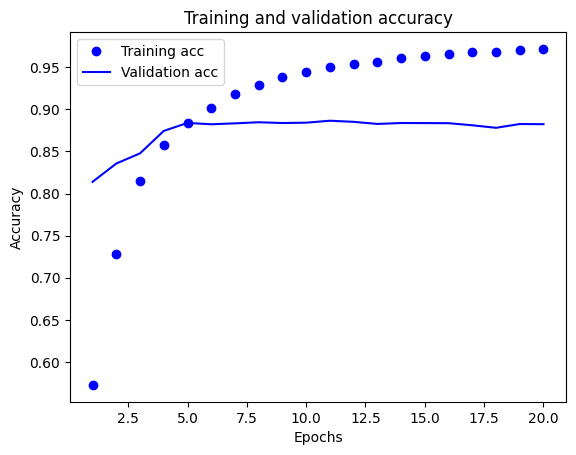

In [119]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [120]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0726 - accuracy: 0.9292
Epoch 2/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0670 - accuracy: 0.9369
Epoch 3/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0619 - accuracy: 0.9422
Epoch 4/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0598 - accuracy: 0.9444
Epoch 5/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0570 - accuracy: 0.9484
Epoch 6/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0547 - accuracy: 0.9508
Epoch 7/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0516 - accuracy: 0.9540
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1124 - accuracy: 0.8818


[0.11244922876358032, 0.8817999958992004]

###**Summary of all models**



In [129]:
All_Loss= np.array([results_M11[0],results_M12[0],results_M21[0],results_M22[0],results_M23[0],results_MSE[0],results_tanh[0],results_regularisation[0],results_Dropout[0],results_Hyper[0]])*100
All_Loss
All_Accuracy= np.array([results_M11[1],results_M12[1],results_M21[1],results_M22[1],results_M23[1],results_MSE[1],results_tanh[1],results_regularisation[1],results_Dropout[1],results_Hyper[1]])*100
All_Accuracy
Labels=['Model_11','Model_12','Model_21','Model_22','Model_23','Model_MSE','model_tanh','model_regularisation','Model_Dropout','Model_Hyper']
plt.clf()

<Figure size 640x480 with 0 Axes>

###**Comparing all models using graph**

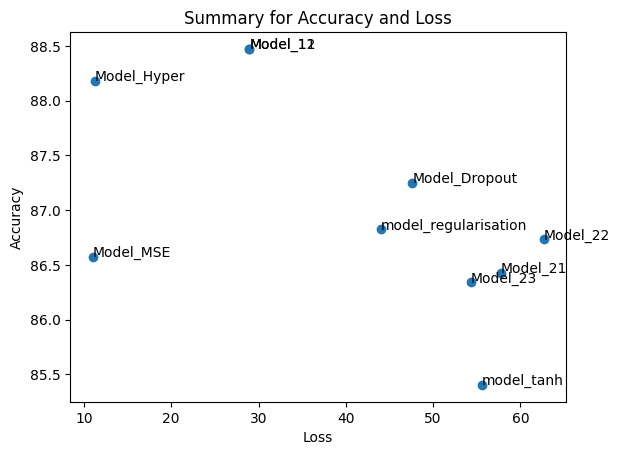

In [130]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

##**Summary:**

Below are the Model description for comparision:
*  **Model_11**(Changed to 3 layers)
*  **Model_12**(Changed to 1 layer)
*  **Model_21**(Chnaged to 32 units of hidden layers)
*  **Model_22**(Chnaged to 64 units of hidden layers)
*  **Model_23**(Chnaged to 128 units of hidden layers)
*  **Model_MSE**(Used MSE loss function)
*  **Model_tanh**(Used tanh activation function)
*  **Model_Regularisation**(L2 regularization with a coefficient of 0.0001 for all your hidden layers)
*  **Model_Dropout**(dropout with a rate of 0.5 after each of the hidden layers)
*  **Model_Hyper**(used all the chnages in one)

**Model Compilation:** The binary cross-entropy loss function is well-suited for evaluating the performance of classification models, where the output represents probabilities between 0 and 1. In contrast, mean squared error (MSE) is commonly used in regression tasks, quantifying how closely a regression line aligns with a set of data points. Squaring the differences between data points and the regression line is essential to ensure that negative discrepancies do not cancel out positive ones.

**From the graphical analysis**, it becomes evident that the highest accuracy and the lowest loss were achieved using the "Model_Hyper." This model employs three deep layers (32, 32, 16) with a dropout rate of 0.5 for each layer. In terms of comparing the MSE loss to other models (excluding the final hypertuned model), it's notable that MSE resulted in minimal loss.

**Units:** As we increase the number of units from 16 to 32, 64, and 128, the accuracy experiences only marginal improvements, while the loss function steadily decreases.

**Hidden Layers:** Interestingly, increasing the number of hidden layers from 1 to 3 had no impact on the loss function, accuracy, or performance.

**Loss Function:** When we employ "mse" as the loss function for the IMDB dataset, the resultant loss value is significantly lower compared to binary cross-entropy, signifying improved convergence.

**Activation Function:** The model's use of the tanh activation function results in lower accuracy, primarily due to issues related to the vanishing gradient problem.

**Regularization:** Contrary to the expected outcome, regularization resulted in a higher loss and decreased accuracy compared to the original model. This observation is somewhat counterintuitive since regularization is typically employed to mitigate overfitting and improve model generalization.

**Dropout:** Dropout regularization also contributes to a diminished loss function but doesn't seem to impact accuracy significantly.